In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filename = '/content/drive/MyDrive/1CodingDojo/Week2/sales_predictions.csv'

df = pd.read_csv(filename)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.groupby('Item_Type')[['Item_MRP']].sum()

,Item_MRP
Item_Type,
Baking Goods,81894.7364
Breads,35379.1198
Breakfast,15596.6966
Canned,90706.7270
Dairy,101276.4596
Frozen Foods,118558.8814
Fruits and Vegetables,178124.0810
Hard Drinks,29334.6766
Health and Hygiene,68025.8388


In [11]:
df.groupby('Item_Type')[['Item_Fat_Content']].count()

,Item_Fat_Content
Item_Type,
Baking Goods,648
Breads,251
Breakfast,110
Canned,649
Dairy,682
Frozen Foods,856
Fruits and Vegetables,1232
Hard Drinks,214
Health and Hygiene,520


In [79]:
df.groupby('Item_Type')[['Item_Outlet_Sales']].sum()

,Item_Outlet_Sales
Item_Type,
Baking Goods,1.265525e+06
Breads,5.532372e+05
Breakfast,2.322990e+05
Canned,1.444151e+06
Dairy,1.522594e+06
Frozen Foods,1.825735e+06
Fruits and Vegetables,2.820060e+06
Hard Drinks,4.577934e+05
Health and Hygiene,1.045200e+06


In [116]:
df['Item_Weight'] = df['Item_Weight'].fillna(method='bfill')
df.groupby('Item_Type')[['Item_Weight']].sum()

,Item_Weight
Item_Type,
Baking Goods,8005.535
Breads,2847.475
Breakfast,1396.270
Canned,8066.315
Dairy,9116.800
Frozen Foods,10973.650
Fruits and Vegetables,16141.115
Hard Drinks,2452.120
Health and Hygiene,6784.535


In [71]:
x1 = list(df['Item_Type'].unique())
y1 = list(df.groupby('Item_Type')[['Item_Fat_Content']].count()['Item_Fat_Content'])

In [78]:
y2 = list(df.groupby('Item_Type')[['Item_Outlet_Sales']].sum()['Item_Outlet_Sales'])

In [120]:
y3 = list(df.groupby('Item_Type')[['Item_Weight']].sum()['Item_Weight'])

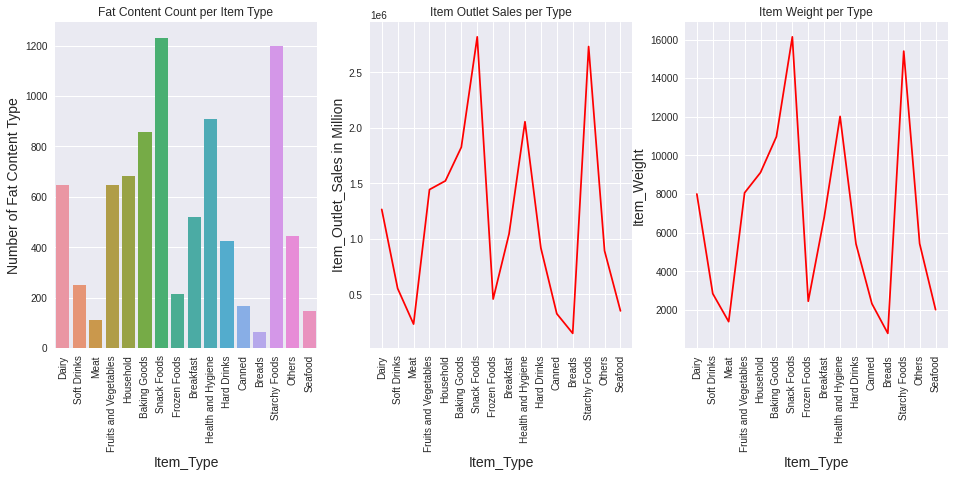

In [129]:
plt.figure(figsize=(16,6))
plt.style.use('seaborn')
# Subplot 1 
plt.subplot(1, 3, 1);
# plt.plot(x1, y1, c = 'r');
sns.barplot(x = x1, y = y1);
plt.xticks(rotation = 90)
plt.title('Fat Content Count per Item Type', fontsize = 12);
plt.xlabel('Item_Type', fontsize=14);
plt.ylabel('Number of Fat Content Type', fontsize=14);

# Subplot 2
plt.subplot(1, 3, 2);
plt.plot(x1, y2, c = 'r');
plt.xticks(rotation = 90)
plt.xlabel('Item_Type', fontsize=14);
plt.ylabel('Item_Outlet_Sales in Million', fontsize=14);
plt.title('Item Outlet Sales per Type', fontsize = 12);

# Subplot 3
plt.subplot(1, 3, 3);
plt.plot(x1, y3, c = 'r');
plt.xticks(rotation = 90)
plt.xlabel('Item_Type', fontsize=14);
plt.ylabel('Item_Weight', fontsize=14);
plt.title('Item Weight per Type', fontsize = 12);


Snack Foods has the more Fat Content Type, Higher sales rates.

In [22]:
df.groupby('Outlet_Establishment_Year')[['Outlet_Identifier']].count()

,Outlet_Identifier
Outlet_Establishment_Year,
1985,1463
1987,932
1997,930
1998,555
1999,930
2002,929
2004,930
2007,926
2009,928


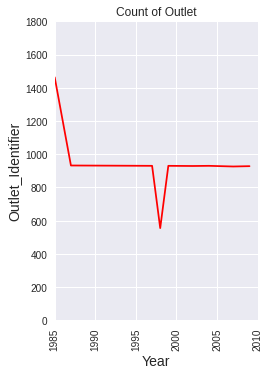

In [128]:
dy = df.groupby('Outlet_Establishment_Year')[['Outlet_Identifier']].count()
year = df['Outlet_Establishment_Year'].sort_values().unique()
outlet = list(dy['Outlet_Identifier'])

plt.style.use('seaborn')
# Subplot 2
plt.subplot(1, 2, 2);
plt.plot(year, outlet, c = 'r');
plt.xticks(rotation = 90)
plt.xlabel('Year', fontsize=14);
plt.ylabel('Outlet_Identifier', fontsize=14);
plt.xlim(left=1985,right=2010)
plt.ylim(bottom=0,top=1800)

plt.title('Count of Outlet', fontsize = 12);


In [131]:
df.groupby('Item_Type')['Item_Visibility'].mean()

Item_Type
Baking Goods             0.069169
Breads                   0.066255
Breakfast                0.085723
Canned                   0.068129
Dairy                    0.072427
Frozen Foods             0.065645
Fruits and Vegetables    0.068513
Hard Drinks              0.064943
Health and Hygiene       0.055216
Household                0.061322
Meat                     0.062284
Others                   0.060241
Seafood                  0.074976
Snack Foods              0.066850
Soft Drinks              0.063972
Starchy Foods            0.067564
Name: Item_Visibility, dtype: float64

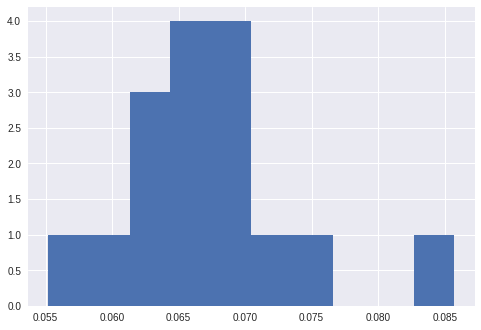

In [133]:
df.groupby('Item_Type')['Item_Visibility'].mean().hist();

In [134]:
df.groupby('Outlet_Type')[['Item_Outlet_Sales']].sum()

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,3.680343e+05
Supermarket Type1,1.291734e+07
Supermarket Type2,1.851823e+06
Supermarket Type3,3.453926e+06


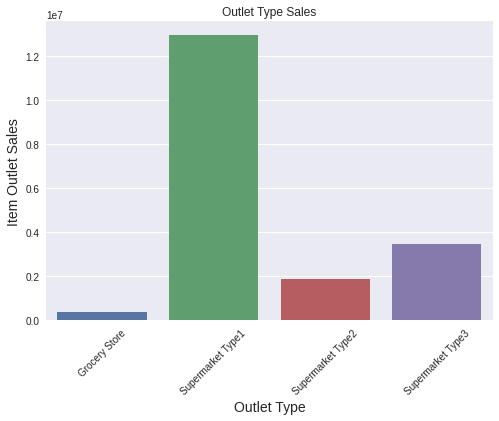

In [154]:
outlet_type = list(df['Outlet_Type'].sort_values().unique())
outlet_sales = list(df.groupby('Outlet_Type')[['Item_Outlet_Sales']].sum()['Item_Outlet_Sales'])

sns.barplot(x = outlet_type, y = outlet_sales);
plt.xticks(rotation = 45)
plt.title('Outlet Type Sales', fontsize = 12);
plt.xlabel('Outlet Type', fontsize=14);
plt.ylabel('Item Outlet Sales', fontsize=14);

Supermarket Type1 sells more items than other stores and supermarkets.